In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
df = pd.read_csv('ads.csv')
df.rename(columns={"Time":"ds", "Ads":"y"}, inplace=True)
df.head()

,ds,y
0,2017-09-13T00:00:00,80115
1,2017-09-13T01:00:00,79885
2,2017-09-13T02:00:00,89325
3,2017-09-13T03:00:00,101930
4,2017-09-13T04:00:00,121630


In [3]:
df.tail()

,ds,y
211,2017-09-21T19:00:00,155890
212,2017-09-21T20:00:00,123395
213,2017-09-21T21:00:00,103080
214,2017-09-21T22:00:00,95155
215,2017-09-21T23:00:00,80285


In [4]:
m = Prophet()
m.fit(df)

15:22:00 - cmdstanpy - INFO - Chain [1] start processing
15:22:00 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
future = m.make_future_dataframe(periods=24*7, freq='H')
future.tail()

,ds
379,2017-09-28 19:00:00
380,2017-09-28 20:00:00
381,2017-09-28 21:00:00
382,2017-09-28 22:00:00
383,2017-09-28 23:00:00


In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
379,2017-09-28 19:00:00,121192.349078,108575.513177,134422.891477
380,2017-09-28 20:00:00,104538.588578,91197.219978,117345.990509
381,2017-09-28 21:00:00,83809.058036,71546.536366,96748.614779
382,2017-09-28 22:00:00,65044.440396,51461.470842,78936.742020
383,2017-09-28 23:00:00,52346.764497,37923.640185,64951.057840


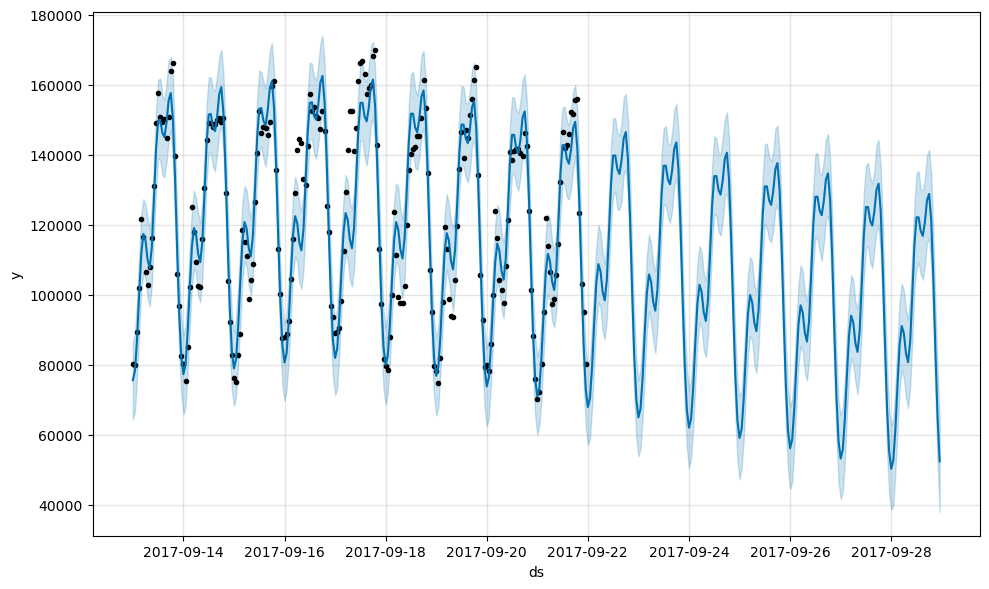

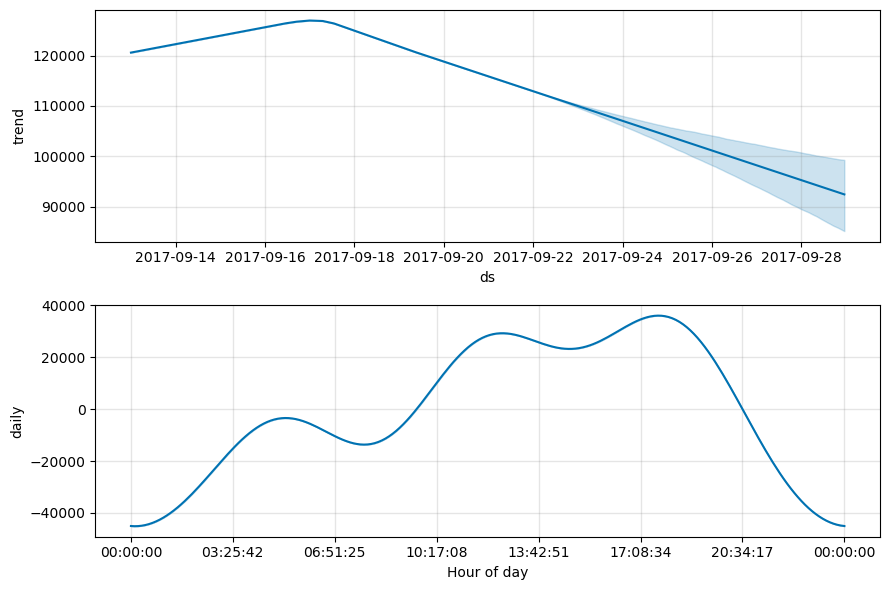

In [7]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

In [14]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

import logging
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)

df_cv = cross_validation(m, initial='5 days', period='1 hours', horizon = '24 hours', parallel="processes")
df_p = performance_metrics(df_cv)
print("Mean MAE: ", str(df_p['mae'].mean()))
df_p

Mean MAE:  8488.122017236594


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 03:00:00,1.335540e+08,11556.558216,8422.338163,0.074774,0.054233,0.072315,0.705749
1,0 days 04:00:00,1.442617e+08,12010.899934,8701.921156,0.076912,0.055716,0.074401,0.682817
2,0 days 05:00:00,1.544916e+08,12429.465381,8998.760510,0.079432,0.057324,0.077013,0.671189
3,0 days 06:00:00,1.619931e+08,12727.651762,9261.599799,0.081750,0.059699,0.079543,0.672481
4,0 days 07:00:00,1.606351e+08,12674.189414,9285.588741,0.081817,0.055833,0.080104,0.672481
5,0 days 08:00:00,1.517006e+08,12316.679955,9129.139654,0.080167,0.057771,0.079154,0.686370
6,0 days 09:00:00,1.405039e+08,11853.432434,8874.712585,0.077545,0.057507,0.077315,0.707364
7,0 days 10:00:00,1.293644e+08,11373.848076,8547.112870,0.074322,0.054326,0.074845,0.696705
8,0 days 11:00:00,1.203194e+08,10969.021739,8222.326954,0.071244,0.056666,0.072340,0.704780
9,0 days 12:00:00,1.132542e+08,10642.095364,7967.886220,0.068810,0.046227,0.070231,0.724806
